<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Gasal 2023/2024

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab 8: *Clustering***

###**Tenggat Waktu: 13 Desember 2024, 23.55 WIB**
</center>

### **Ketentuan:**

1. Dokumen template lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan** yang disisipkan pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb** . Contoh: A_Lab1_1806205773_Abdurrafi Arief.ipynb. Kesalahan dalam pengumpulan nama akan dikenakan pinalti sebesar 5 poin.
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **Tenggat Waktu: 13 Desember 2024, 23.55 WIB**.
5. Keterlambatan pengumpulan akan dikenakan pinalti sebesar 5 poin per jam. Dengan cut off 1 hari.
6. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.
7. Pakta Integritas **Wajib** di isi dan di jalankan. Submisi hanya akan dinilai jika pakta integritas di isi dan di jalankan.
8. Sebelum di kumpulkan, kode **WAJIB** dijalankan. Jika tidak, dikenakan penalti sebesar 50%.

In [1]:
# Isi dengan data diri Anda
NAMA = "Alden Luthfi"
KELAS = "A"
NPM = "2206028932"
USERNAME_KAGGLE = ""

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [2]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Alden Luthfi dari kelas A dengan NPM 2206028932, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Alden Luthfi)


## Import Library

In [3]:
# Impor library dan modul yang dibutuhkan pada tugas ini (boleh ditambahkan jika kurang)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

## Intro to Clustering
Clustering merupakan bagian dari unsupervised learning. Proses yang dilakukan adalah mengelompokkan data points ke dalam beberapa grup/klaster. Harapannya adalah objek pada klaster yang sama akan memiliki similarity yang tinggi. Sebaliknya, objek yang berada di klaster berbeda akan memiliki similarity yang rendah. Berbeda dengan supervised learning yang datanya sudah memiliki label yang bersesuaian, algoritma clustering tidak secara eksplisit menjelaskan makna tiap klaster. Oleh karena itu, tiap-tiap klaster tersebut perlu diinterpretasikan sendiri.

Algoritma clustering yang akan digunakan untuk lab ini adalah **K-Means** dan **Hierarchical** atau Agglomerative clustering. Berikut adalah penjelasan singkat mengenai keduanya:
1) **K-Means** membagi data menjadi K kluster di mana setiap titik data termasuk dalam kluster dengan pusat yang terdekat. Tujuan utamanya adalah untuk mengurangi variasi dalam kluster dan memaksimalkan variasi antara kluster.
2) **Hierarchical Clustering** membangun hirarki kluster dengan menggabungkan atau membagi kluster dalam langkah-langkah yang berurutan. Ini menghasilkan pohon kluster yang dapat diwakili sebagai dendrogram, yang memungkinkan analisis tingkat hierarki.

Mari kita lihat penerapan clustering menggunakan Scikit-Learn.

### K-Means Clustering

**Penjelasan Dataset**

| Atribut              | Penjelasan                                |
|--------------------- |-------------------------------------------|
| marital_status | Status pernikahan |
| income               | Pendapatan tahunan (USD)        |
| num_store_purchases  | Jumlah pembelian melalui toko offline     |
> Dataset merupakan adaptasi dan modifikasi dari https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis dan Lab 9 KASDD Genap 22/23

In [4]:
# Load dataset
df = pd.read_csv('https://drive.google.com/uc?id=1CezmkPIZuLnpHVZutr5oYg8QSsZfPlv3')
df = df.drop('Unnamed: 0', axis=1)
df.head()

,income,num_store_purchases,marital_status
0,58138.0,4,Single
1,46344.0,2,Single
2,71613.0,10,Together
3,26646.0,4,Together
4,58293.0,6,Married


In [5]:
print(f"Ukuran dataset: {df.shape}")

Ukuran dataset: (500, 3)


In [6]:
# Melihat informasi dasar dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   income               500 non-null    float64
 1   num_store_purchases  500 non-null    int64  
 2   marital_status       500 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 11.8+ KB


In [7]:
# Melihat deskripsi statistik dasar dari kolom
df.describe()

,income,num_store_purchases
count,500.000000,500.000000
mean,51387.664000,5.800000
std,21245.949246,3.306034
min,2447.000000,0.000000
25%,34284.000000,3.000000
50%,50898.000000,5.000000
75%,67320.000000,8.000000
max,157243.000000,13.000000


Pada tahap ini, kita bisa melakukan imputasi data yang kosong, menghilangkan duplikat, dan menghapus outlier. Namun, hal ini tidak perlu kita lakukan pada dataset ini karena dataset tersebut sudah bersih.

Hal yang perlu dilakukan selanjutnya adalah melakukan standarisasi dan encoding kolom kategorikal.

In [8]:
# Melakukan Standarisasi
from sklearn.preprocessing import StandardScaler

numerical_attributes = ['income', 'num_store_purchases']

df_std = pd.DataFrame(StandardScaler().fit_transform(df[numerical_attributes]), columns=numerical_attributes)
df_std['marital_status'] = df['marital_status']  # Membiarkan dulu atribut kategorikal
df_std.head()

,income,num_store_purchases,marital_status
0,0.318042,-0.545004,Single
1,-0.237632,-1.150565,Single
2,0.952915,1.271677,Together
3,-1.165702,-0.545004,Together
4,0.325344,0.060556,Married


In [9]:
# Melakukan Encoding
print(f"Jumlah label unik dari marital status: {df['marital_status'].nunique()}")
print(f"{df['marital_status'].unique()}\n")

Jumlah label unik dari marital status: 6
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone']



In [10]:
# !pip install --upgrade category_encoders

In [11]:
from category_encoders import OrdinalEncoder

marital_map =[{'col': 'marital_status',
             'mapping':{'Single': 1,
                        'Alone': 1,
                        'Together': 2,
                        'Married': 3,
                        'Divorced': 4,
                        'Widow': 5,}
            }]

enc2 = OrdinalEncoder(mapping=marital_map)
df_enc = enc2.fit_transform(df_std)

df_enc.head()

,income,num_store_purchases,marital_status
0,0.318042,-0.545004,1
1,-0.237632,-1.150565,1
2,0.952915,1.271677,2
3,-1.165702,-0.545004,2
4,0.325344,0.060556,3


**Persiapan Clustering**<br>
Selanjutnya, kita harus menentukan nilai K sebagai input dari algoritma K-means. **Silhouette Coefficient** merupakan salah satu metrik umum untuk mengevaluasi data yang tidak memiliki *true cluster*. Silhouette Coefficient menghitung rata-rata jarak intra-cluster dan minimum rata-rata jarak inter-cluster.


In [12]:
# Menghitung Silhouette Coeff
for k in [2, 3, 4, 5]:
    # Mendefinisikan model K-Means dengan nilai k tertentu
    clusterer = KMeans(n_clusters = k, n_init=10)

    # Menghitung sihouette_score untuk mengukur seberapa baik klaster yang terbentuk.
    cluster_labels = clusterer.fit_predict(df_enc)
    silhouette_avg = silhouette_score(df_enc, cluster_labels)
    print(f"Untuk k = {k}, rata-rata silhouette_coefficient adalah: {silhouette_avg}")

Untuk k = 2, rata-rata silhouette_coefficient adalah: 0.38807169772444033
Untuk k = 3, rata-rata silhouette_coefficient adalah: 0.3728268092814725
Untuk k = 4, rata-rata silhouette_coefficient adalah: 0.36669254472927043
Untuk k = 5, rata-rata silhouette_coefficient adalah: 0.36154706822245497


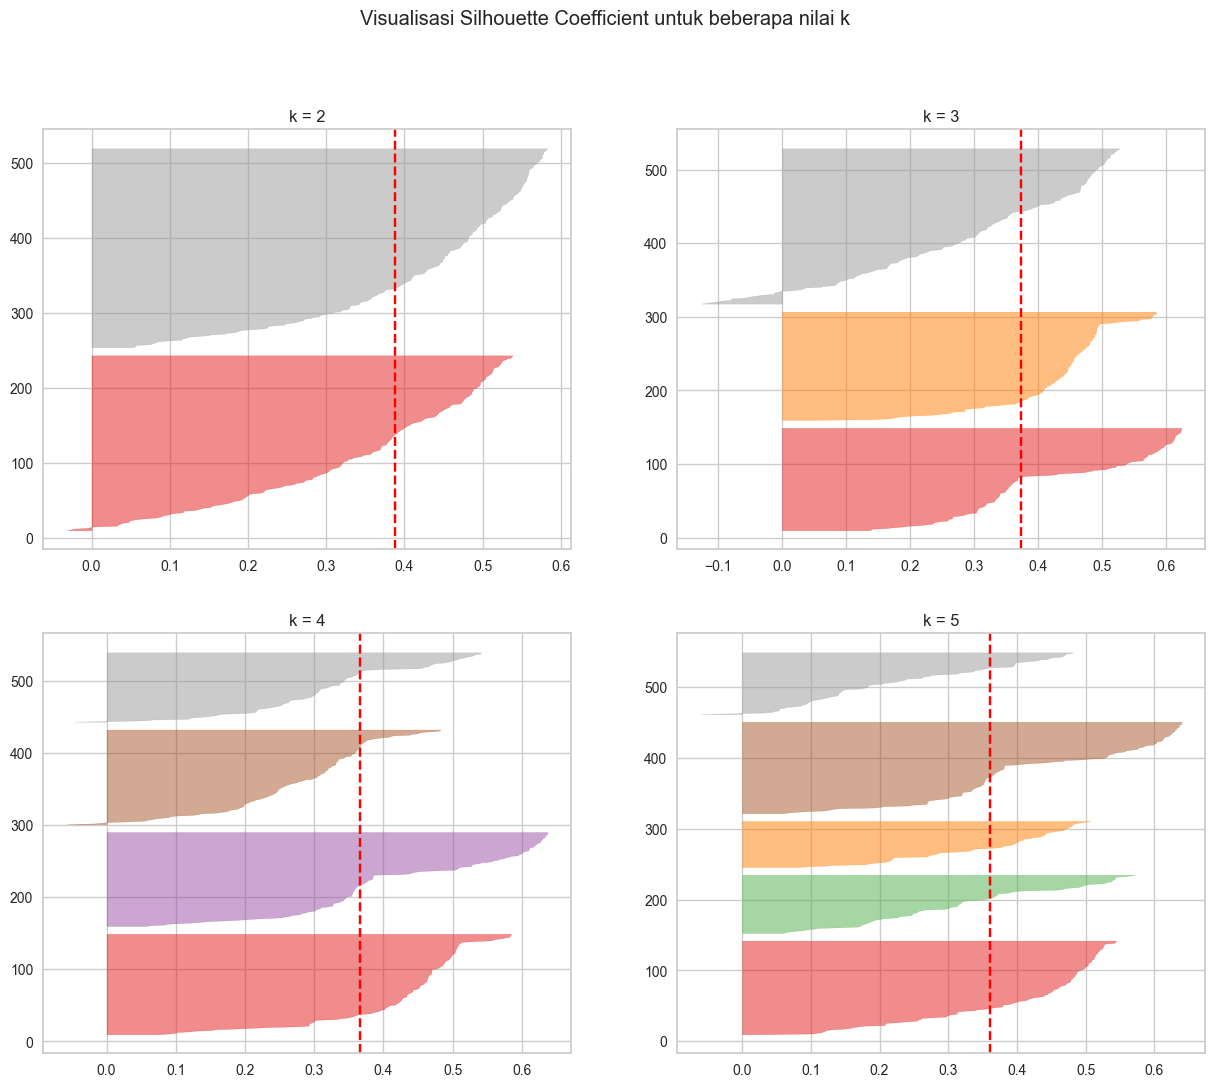

In [13]:
# Memvisualisasikan silhouette

fig, ax = plt.subplots(2, 2, figsize=(15,12))
fig.suptitle("Visualisasi Silhouette Coefficient untuk beberapa nilai k")
for k in [2, 3, 4, 5]:
    # Mendefinisikan model K-Means dengan nilai k tertentu
    clusterer = KMeans(n_clusters=k, n_init=10)

    # Memvisualisasikan densitas tiap klaster yang terbentuk
    q, mod = divmod(k, 2)
    ax[q-1][mod].set_title(f"k = {k}")
    visualizer = SilhouetteVisualizer(clusterer, ax = ax[q-1][mod])
    visualizer.fit(df_enc)

**Metrik Pendukung**
Metrik lain yang juga menjadi acuan untuk menentukan jumlah klaster adalah **Elbow Method**. Cara kerjanya adalah menampilkan plot inersia di berbagai nilai k yang menunjukkan seberapa baik klaster yang dihasilkan terhadap datanya. Pada nilai k yang tepat, akan muncul suatu "inflection point" di mana terjadi perubahan drastis pada gradien kurva.

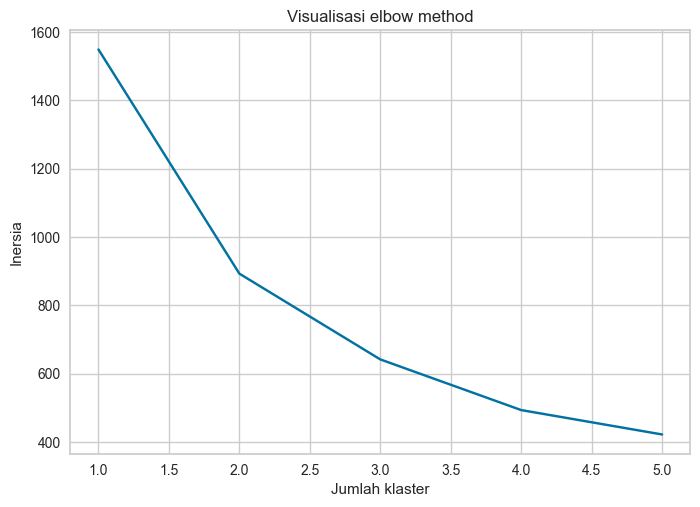

In [14]:
# Memvisualisasikan elbow method
inertia = []
for cluster in range(1, 6):
    km = KMeans(n_clusters=cluster, n_init=10)
    km = km.fit(df_enc)
    inertia.append(km.inertia_)

plt.plot(range(1, 6), inertia, 'bx-')
plt.xlabel('Jumlah klaster')
plt.ylabel('Inersia')
plt.title('Visualisasi elbow method')
plt.show()

Berdasarkan hasil metrik Silhouette Coeff. dan Elbow Method, data ini tidak menghasilkan klaster yang baik. Nilai $s(C)$ untuk `k = 2`, `k = 3`, `k = 4`, dan `k = 5` tidak jauh berbeda. Hal ini juga dibuktikan dari plot Elbow Method di atas: tidak ada inflection point yang perubahan gradiennya cukup drastis. Nilai K yang dipilih adalah `k = 2` karena nilai $s(C)$ untuk `k = 2` merupakan yang paling tinggi. Selain itu, perubahan gradien inersia di sebelah kiri `k = 2` paling drastis di antara keempat kandidat klaster

**Train Model**<br>
Latih model KMeans dengan memilih parameter cluster berdasarkan nilai k yang dipilih.

In [15]:
# Latih model sesuai jumlah klaster optimal
kmeans = KMeans(n_clusters=2, n_init=10)
assignment = kmeans.fit_predict(df_enc)

In [16]:
# Append hasil clustering ke dataframe
df_with_clusters = pd.DataFrame(df_enc.copy())
df_with_clusters['cluster'] = assignment
df_with_clusters.head()

,income,num_store_purchases,marital_status,cluster
0,0.318042,-0.545004,1,1
1,-0.237632,-1.150565,1,1
2,0.952915,1.271677,2,0
3,-1.165702,-0.545004,2,1
4,0.325344,0.060556,3,0


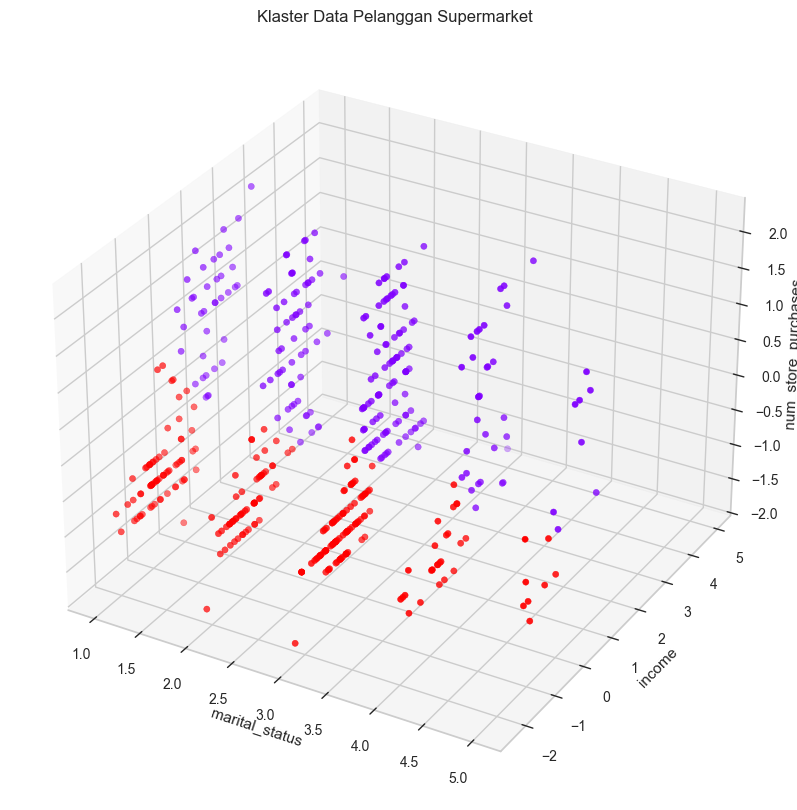

In [17]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection="3d")

# Menyiapkan beberapa variabel yang diperlukan untuk visualisasi
x = df_with_clusters['marital_status']
y = df_with_clusters['income']
z = df_with_clusters['num_store_purchases']
cluster = df_with_clusters['cluster']

# Memvisualisasikan hasilnya
ax.scatter(x, y, z, c = cluster, cmap = "rainbow")
plt.title("Klaster Data Pelanggan Supermarket")
plt.grid(False)
ax.set_xlabel('marital_status')
ax.set_ylabel('income')
ax.set_zlabel('num_store_purchases')

plt.show()

> **Contoh interpretasi hasil**: Pada tiap kelas `marital_status` terdapat kedua jenis cluster, sehingga kelas `marital_status` tidak menentukan clustering secara signifikan. Di sisi lain, pola yang terlihat adalah cluster ungu selalu berada di kiri cluster merah. Ini menandakan bahwa atribut `income` merupakan pemisah utama. Cluster merah juga memiliki `num_store_purchases` yang lebih merata dibandingkan cluster ungu yang kebanyakan di bawah.

### Hierarchical (Agglomerative) Clustering
Berbeda dengan KMeans yang menentukan jumlah klaster kemudian mengevaluasinya, Agglomerative clustering mencari garis vertikal terpanjang yang menunjukkan pemisahan yang baik antara klaster yang terbentuk. Sebelum mengembangkan model untuk memprediksi klaster dari data, langkah pertama adalah menentukan jumlah klaster optimal berdasarkan visualisasi dendrogram.

Kita akan menggunakan dataset yang sama (`df_enc`) untuk pembuatan clustering hierarchical ini.

In [18]:
# Membuat model sementara untuk divisualisasikan
agglomerative  = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
cluster_assignment = agglomerative.fit(df_enc)

# Menampilkan label klaster tiap data points
cluster_assignment.labels_

array([307, 438, 499, 260, 342, 429, 367, 305, 497, 323, 310, 496, 357,
       421, 387, 295, 341, 493, 253, 451, 414, 495, 287, 435, 447, 266,
       368, 315, 280, 345, 351, 490, 316, 352, 296, 330, 376, 303, 349,
       445, 489, 401, 482, 249, 453, 491, 247, 263, 284, 293, 275, 257,
       297, 407, 424, 391, 397, 392, 462, 309, 255, 432, 365, 369, 317,
       418, 325, 413, 420, 422, 354, 416, 439, 476, 463, 264, 277, 466,
       443, 360, 436, 372, 474, 340, 302, 460, 409, 477, 398, 427, 198,
       175, 483, 390, 444, 492, 379, 262, 488, 380, 370, 389, 294, 465,
       415, 374, 411, 343, 478, 346, 431, 333, 417, 259, 450, 271, 308,
       258, 327, 467, 366, 322, 378, 400, 291, 388, 232, 468, 487, 375,
       383, 425, 441, 254, 464, 210, 326, 452, 217, 381, 384, 486, 243,
       162, 412, 290, 471, 475, 498, 406, 300, 473, 328, 157, 481, 449,
       371, 324, 225, 289, 184, 386, 183, 244, 448, 428, 359, 278, 399,
       306, 182, 238, 131, 298, 461, 208, 265, 240, 470, 394, 18

In [19]:
# Fungsi untuk menampilkan dendogram
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot dendogram yang dihasilkan
    shc.dendrogram(linkage_matrix, **kwargs)

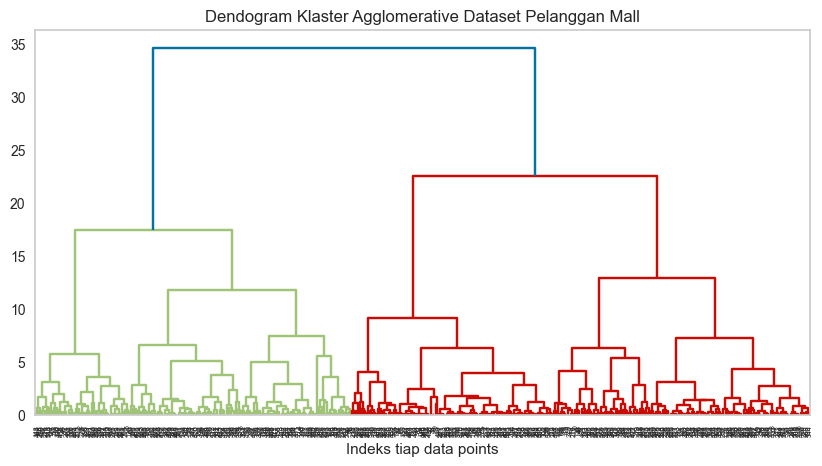

In [20]:
plt.figure(figsize=(10, 5))
plt.grid(False)
plot_dendrogram(agglomerative, truncate_mode=None)
plt.title("Dendogram Klaster Agglomerative Dataset Pelanggan Mall")
plt.xlabel("Indeks tiap data points")
plt.show()

Secara rule-of-thumb, garis biru merupakan jumlah k yang optimal. Namun, berdasarkan dendogram yang dibentuk, data ini tidak menghasilkan klaster yang baik: panjang garis biru dan merah sebenarnya tidak jauh berbeda. Idealnya, garis biru akan jauh lebih panjang daripada garis-garis lainnya dan kita akan lebih mudah membuat batas threshold seperti di bawah ini.

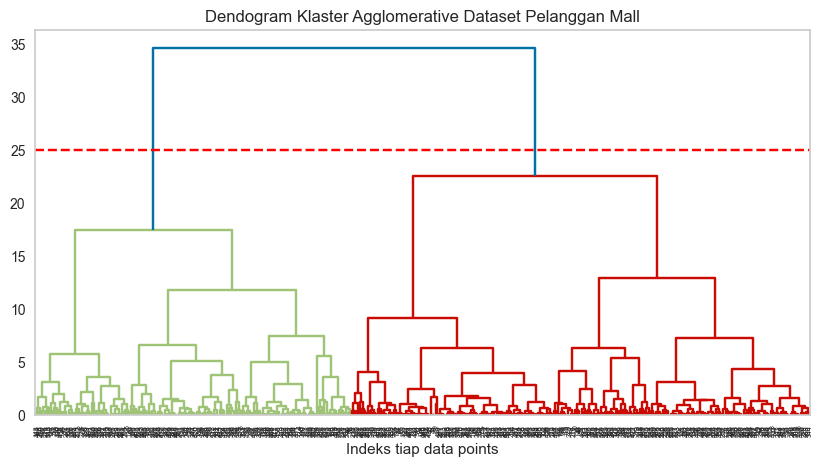

In [21]:
plt.figure(figsize=(10, 5))
plt.grid(False)
plot_dendrogram(agglomerative, truncate_mode=None)
plt.title("Dendogram Klaster Agglomerative Dataset Pelanggan Mall")
plt.xlabel("Indeks tiap data points")
plt.axhline(y = 25, color = 'red', linestyle = 'dashed')
plt.show()

Selanjutnya, kita bisa membuat model Agglomerative Clustering dengan nilai k yang didapatkan sebelumnya. Setelah itu, visualisasikan hasil modelnya.

In [22]:
# Definisikan model dengan hasil visualisasi sebelumnya
agglomerative = AgglomerativeClustering(n_clusters=2)
cluster_assignment2 = agglomerative.fit_predict(df_enc)

In [23]:
# Append hasil clustering ke dataframe
df_with_clusters_agg = pd.DataFrame(df_enc.copy())
df_with_clusters_agg['cluster'] = cluster_assignment2
df_with_clusters_agg.head()

,income,num_store_purchases,marital_status,cluster
0,0.318042,-0.545004,1,0
1,-0.237632,-1.150565,1,0
2,0.952915,1.271677,2,1
3,-1.165702,-0.545004,2,0
4,0.325344,0.060556,3,1


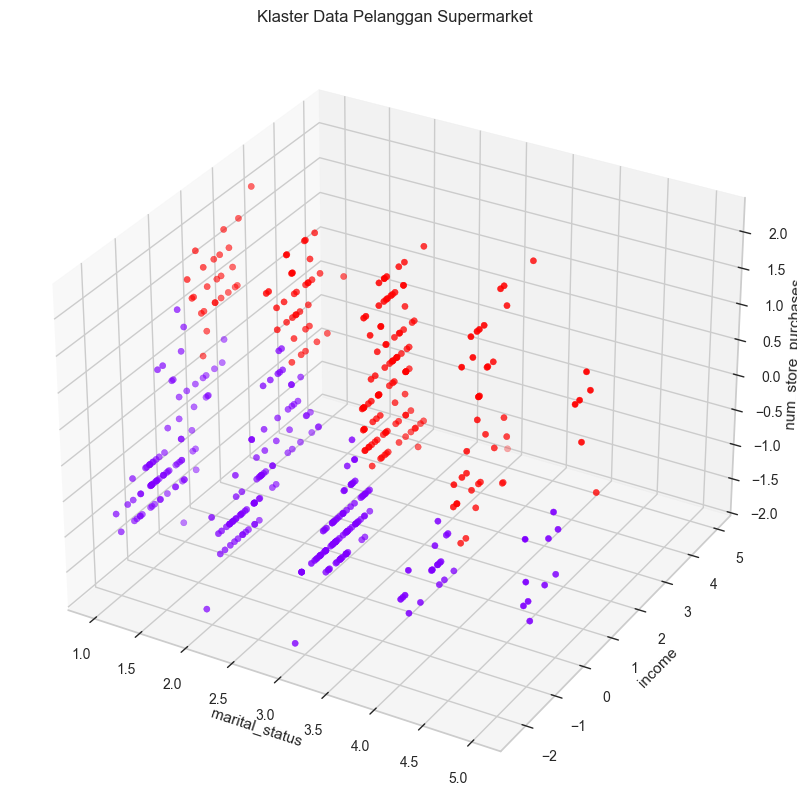

In [24]:
# Melakukan visualisasi
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection="3d")

x = df_with_clusters_agg['marital_status']
y = df_with_clusters_agg['income']
z = df_with_clusters_agg['num_store_purchases']
cluster = df_with_clusters_agg['cluster']

ax.scatter(x, y, z, c = cluster, cmap = "rainbow")
plt.title("Klaster Data Pelanggan Supermarket")
plt.grid(False)
ax.set_xlabel('marital_status')
ax.set_ylabel('income')
ax.set_zlabel('num_store_purchases')

plt.show()

# Latihan

In [25]:
# JANGAN UBAH INI
dataset = {
  0: "1lmnrwIuAzfviuDGjspPlg-k3axo6rwRZ",
  1: "1atkXgeUP8DG0g_218-4mFFBRaElQuEb1"
}

def get_dataset():
  try:
    code_dataset = int(NPM) % 2
    df = pd.read_csv(f'https://drive.google.com/uc?id={dataset[code_dataset]}')

    return df
  except:
    return pd.DataFrame()

In [26]:
df = get_dataset()

In [27]:
if 'CustomerID' in df.columns:
    df = df.drop(['CustomerID'], axis=1)
if 'Order ID' in df.columns:
    df = df.drop(['Order ID'], axis=1)
if 'Customer ID' in df.columns:
    df = df.drop(['Customer ID'], axis=1)
if 'Customer Name' in df.columns:
    df = df.drop(['Customer Name'], axis=1)
if 'Product ID' in df.columns:
    df = df.drop(['Product ID'], axis=1)
if 'Product Name' in df.columns:
    df = df.drop(['Product Name'], axis=1)
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


## Preprocess Dataset

Pada tahap preprocessing dataset, persiapan yang dilakukan setidaknya perlu melakukan hal berikut:

1. Mengecek dan menangani missing values
2. Mengecek dan menangani data duplikat
3. Menangani outlier
4. Melakukan standarisasi
5. Melakukan encoding pada atribut kategorikal

Wajib untuk mencantumkan sumber terkait








> **Lakukan preprocessing dataset dengan melakukan minimal 5 persiapan diatas beserta alasannya dan cantumkan sumber terkait**



### Pengananan Missing Value (beserta alasannya)

In [28]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

tidak ada missing value.

### Pengananan Data Duplikat (beserta alasannya)

In [29]:
display(df.duplicated().sum())
df.drop_duplicates(inplace=True)

24

Data duplikat dihapus karena jumlahnya sangat sedikit dibanding keseluruhan data dan akan mempengaruhi hasil clustering.

### Pengananan outlier (beserta alasannya)

Outlier tidak dihapus karena dari keseluruhan data, outlier pada suatu kolom bukan berarti keseluruhan datum tersebut outlier.

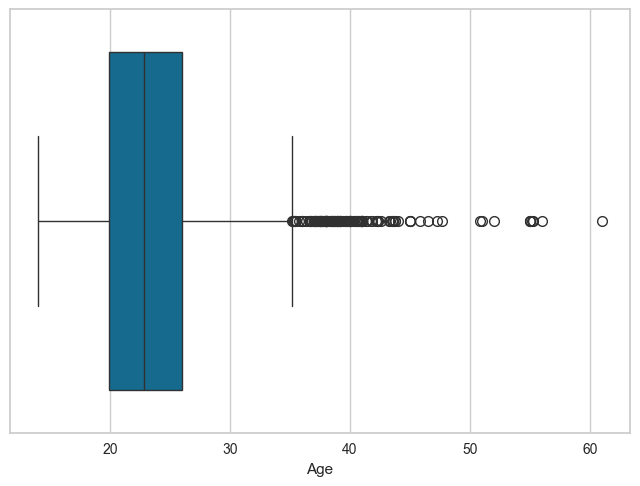

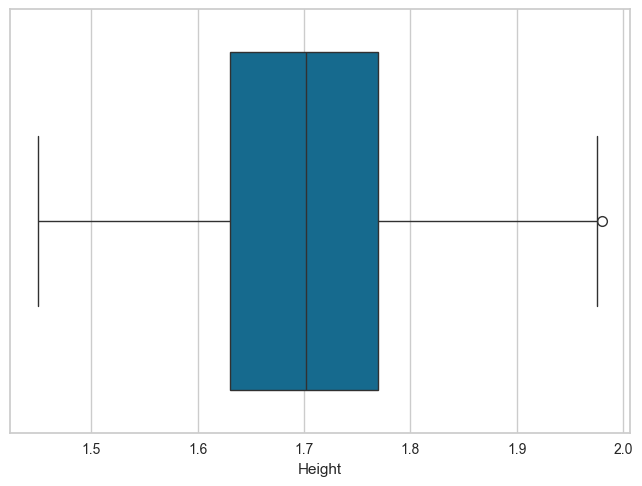

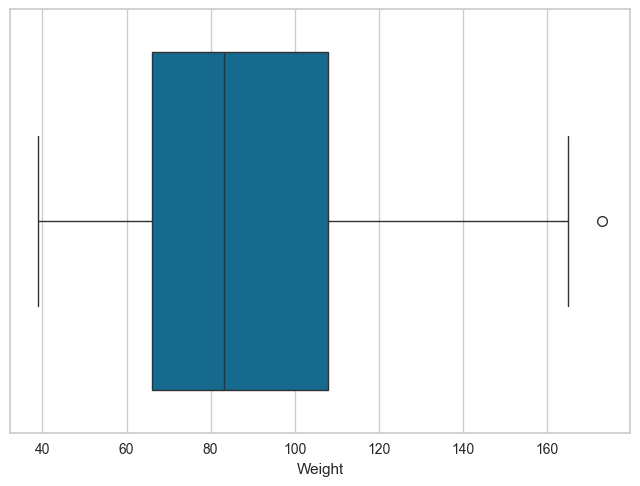

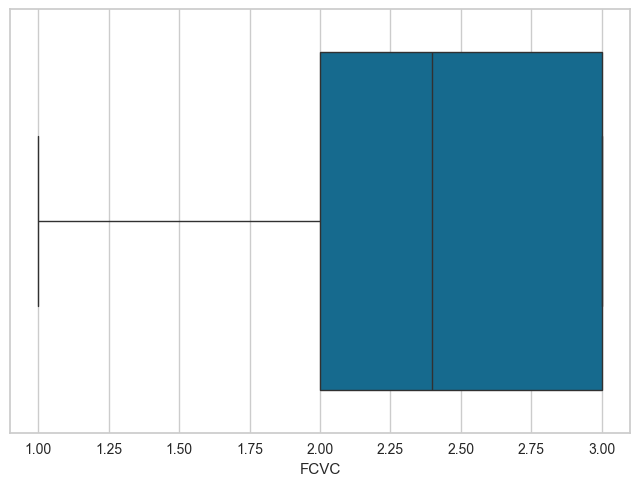

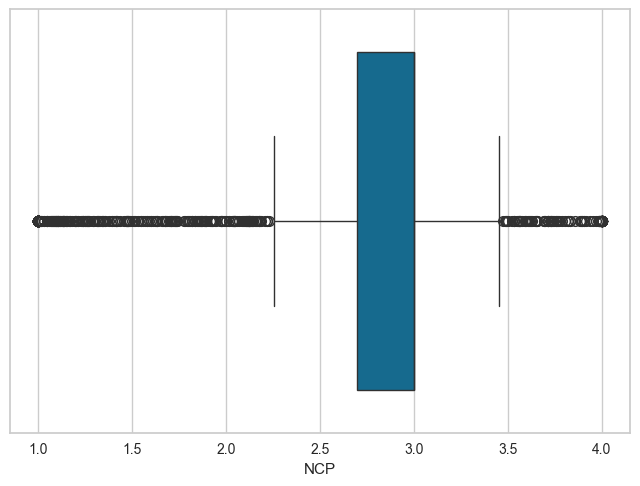

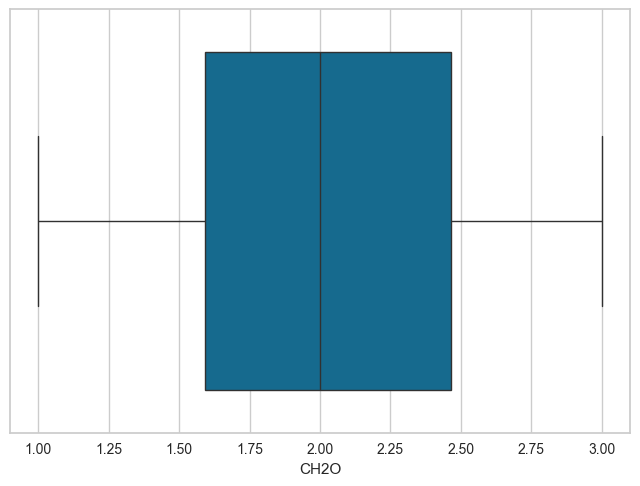

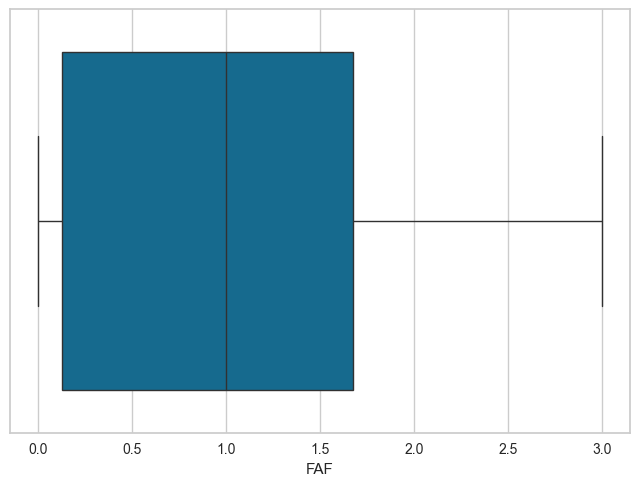

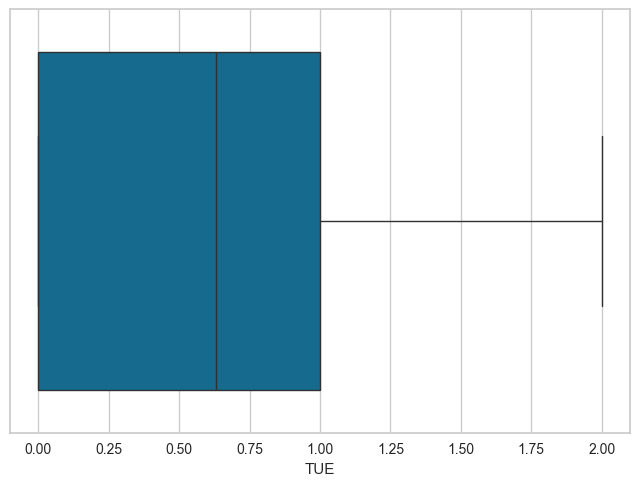

In [30]:
import seaborn as sns

numbers = df.select_dtypes(include='number').columns

for number in numbers:
    sns.boxplot(x=df[number])
    plt.show()


### Pengananan standarisasi (beserta alasannya)

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

numbers = df.select_dtypes(include='number').columns
df[numbers] = scaler.fit_transform(df[numbers])

Digunakan min max scaler karena lebih sderhana agar data berada pada rentang 0-1.

### Pengananan encoding pada atribut kategorikal (beserta alasannya)

In [32]:
df = pd.get_dummies(df, drop_first=True).astype(float)

Dilakukan one hot encoding karena data ketegorikal memiliki sedikit kelas dan tidak terlalu banyak. One hot encoding juga digunakan daripada label encoding karena label encoding akan memberikan bobot pada data yang tidak seharusnya.

## Pemilihan fitur

Buatlah dataset baru yang hanya memiliki fitur (kolom) pilihan. Pilih setidaknya 3 fitur, mencakup fitur numerik dan kategorikal, dan jelaskan alasan pemilihan fitur tersebut. Dataset ini akan digunakan untuk melakukan clustering

In [33]:
df.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_Male', 'family_history_with_overweight_yes', 'FAVC_yes',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_yes', 'SCC_yes',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking',
       'NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I',
       'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III',
       'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II'],
      dtype='object')

In [34]:
selection = ['Height', 'Weight', 'MTRANS', 'CH2O', 'SMOKE', 'family_history', 'NObeyesdad_Normal', 'NObeyesdad_Overweight']

cols = [col for col in df.columns if any(col.startswith(s) for s in selection)]

df_ = df[cols]
df_

,Height,Weight,CH2O,family_history_with_overweight_yes,SMOKE_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Normal_Weight,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,0.320755,0.186567,0.500000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.132075,0.126866,1.000000,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.660377,0.283582,0.500000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.660377,0.358209,0.500000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.622642,0.379104,0.500000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.491943,0.689616,0.364070,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2107,0.563366,0.707037,0.502565,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2108,0.570200,0.706637,0.527097,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2109,0.546132,0.704079,0.926170,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## K-Means Clustering

### a) Hitung dan visualisasikan nilai Silhouette Coefficient untuk dataset baru yang telah dibuat pada poin (a). Berikan interpretasi hasilnya

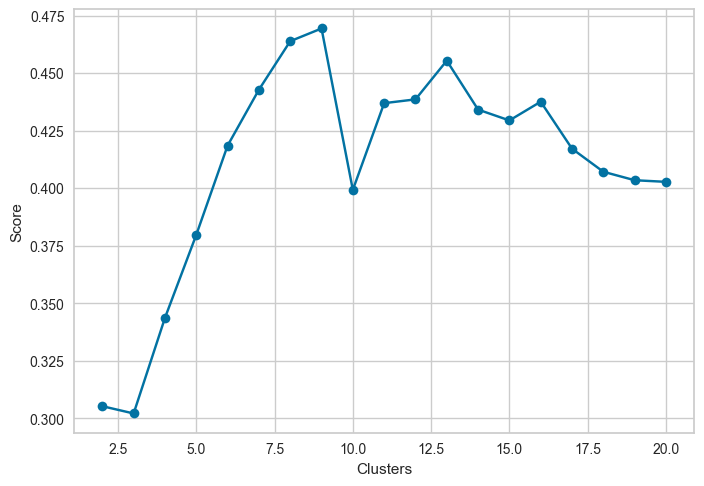

In [35]:
silhouette_scores = []

for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_)

    score = silhouette_score(df_, kmeans.labels_)
    silhouette_scores.append(score)

silhouette_scores = np.array(silhouette_scores).reshape(-1, 1)

plt.plot(range(2, 21), silhouette_scores, marker='o')
plt.xlabel('Clusters')
plt.ylabel('Score')
plt.grid(True)
plt.show()

### b) Tampilkan visualisasi elbow method dengan suatu rentang nilai k (bisa berbeda)

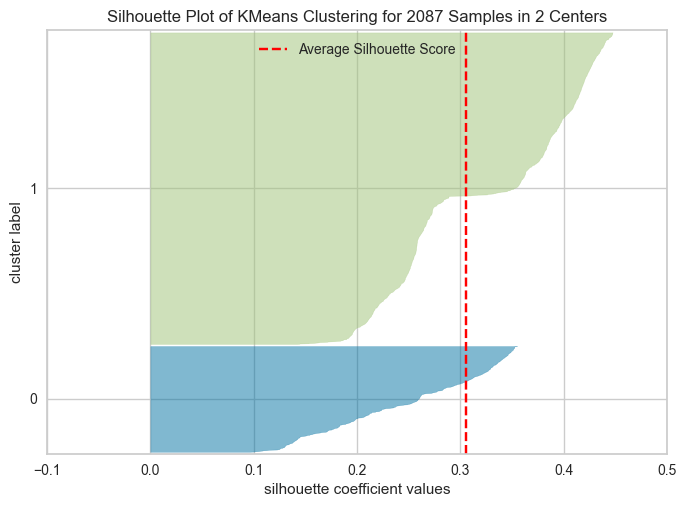

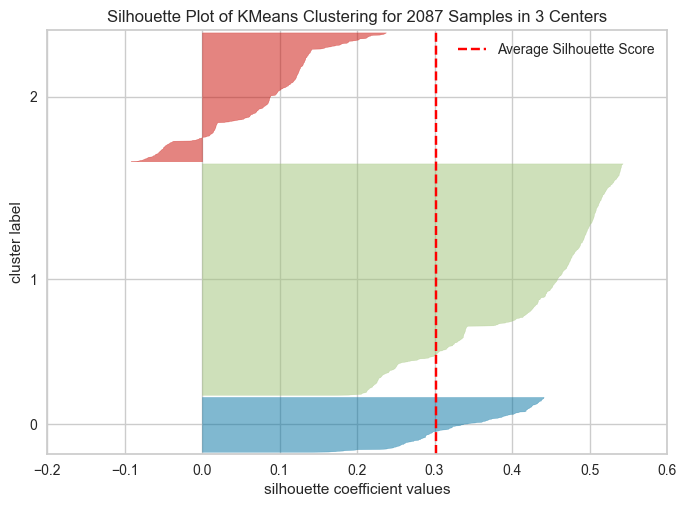

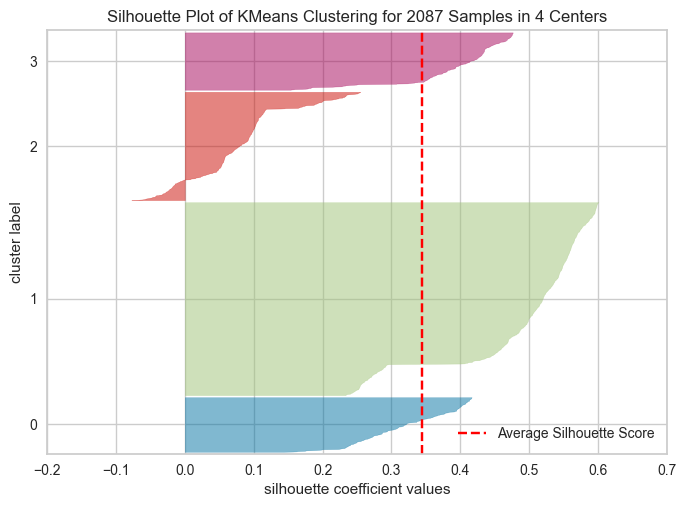

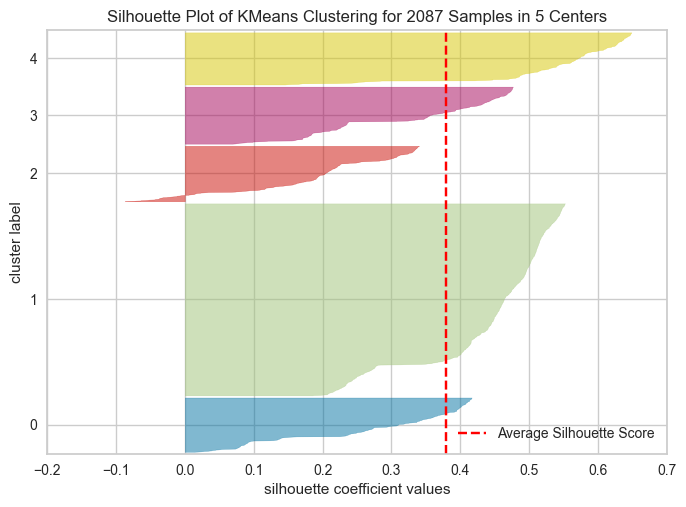

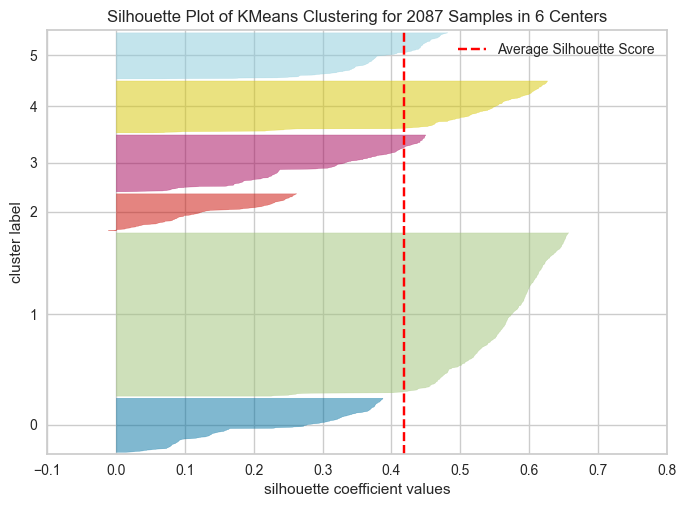

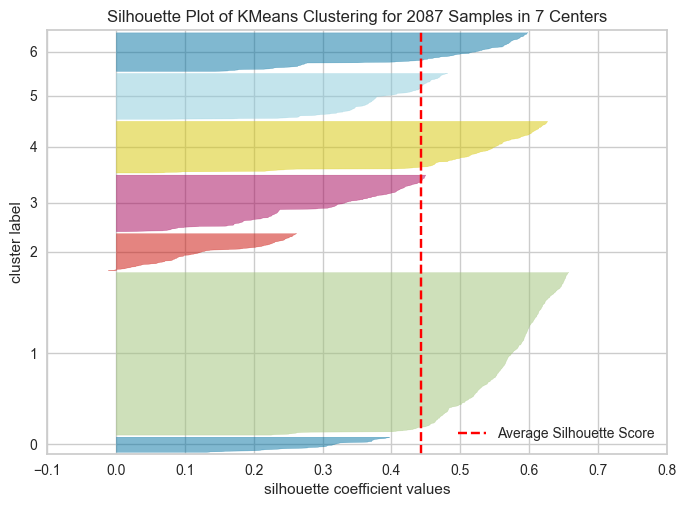

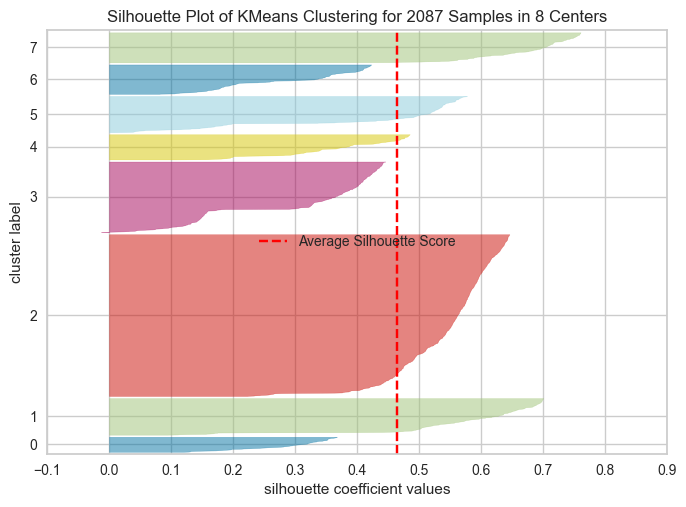

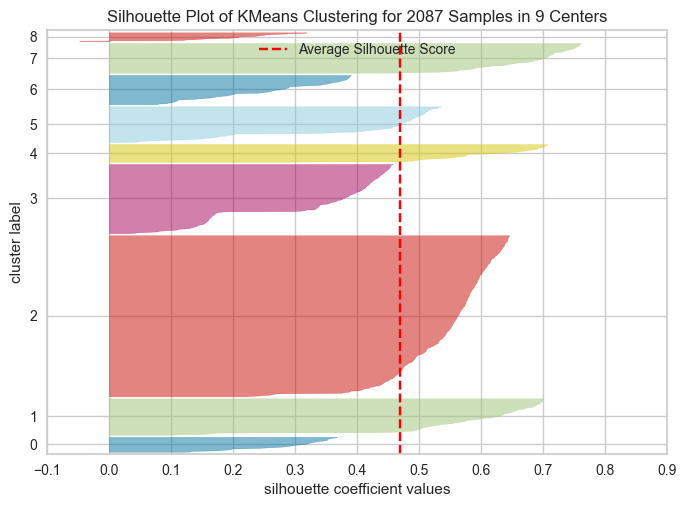

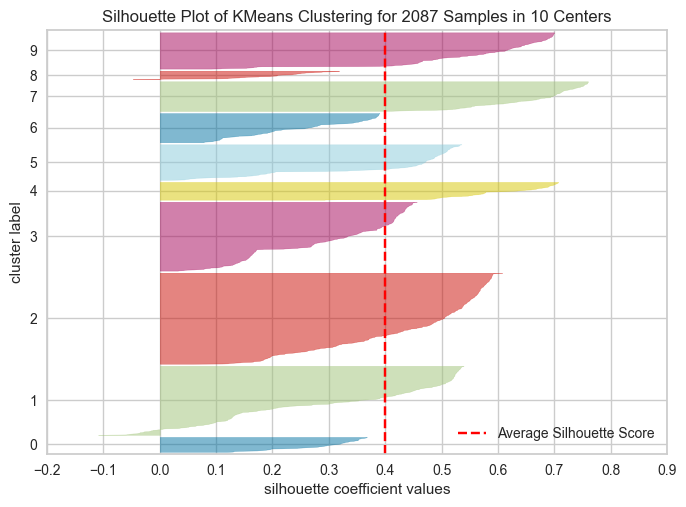

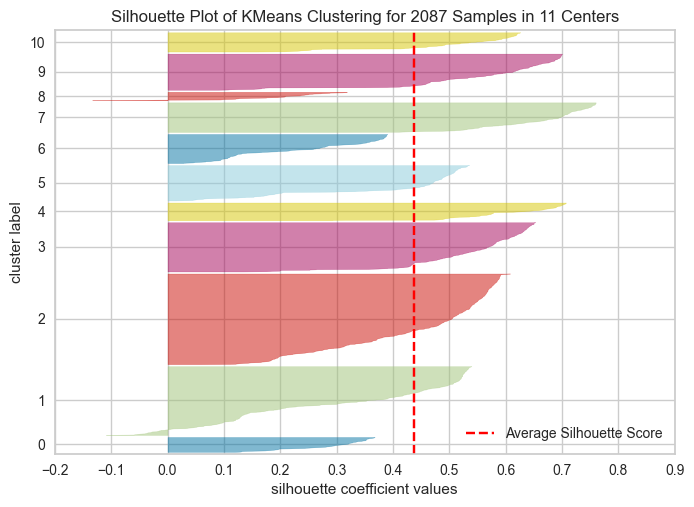

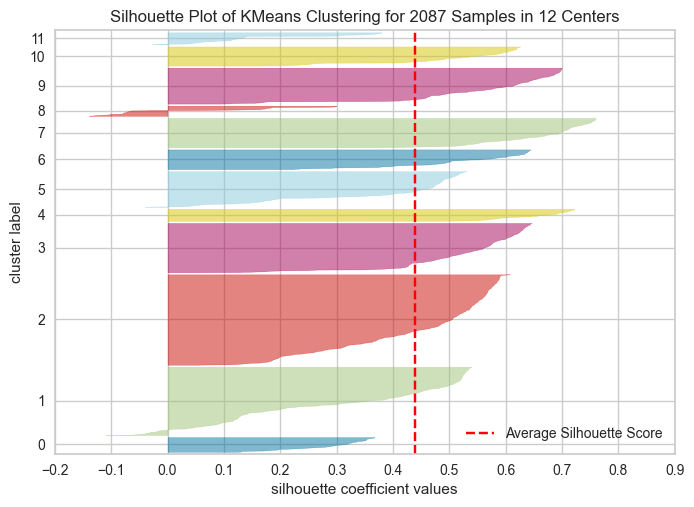

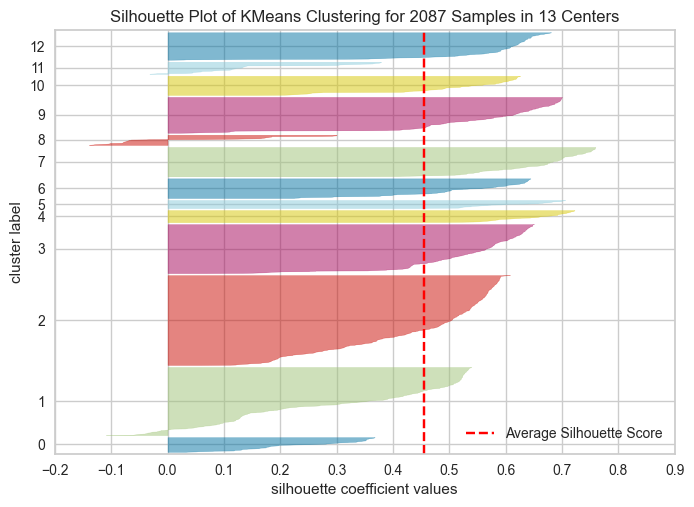

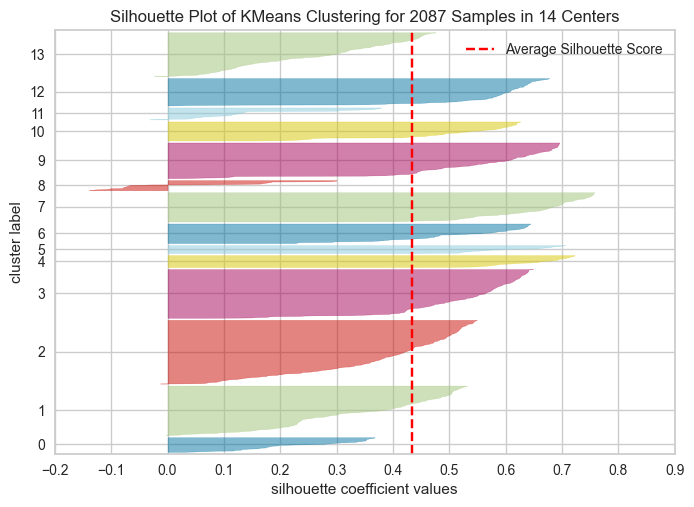

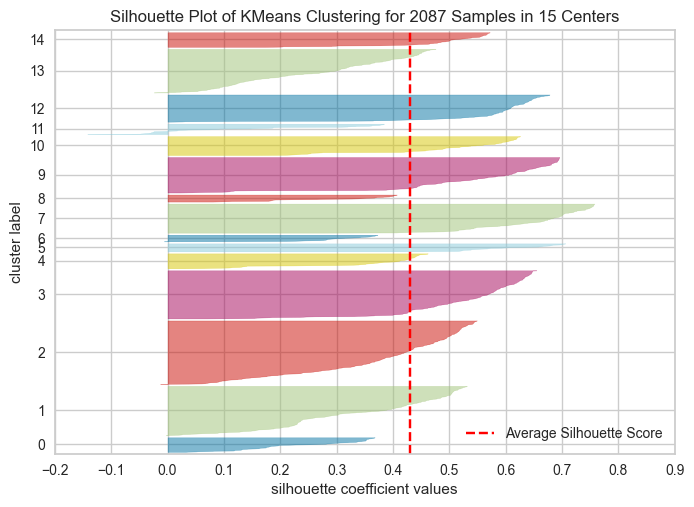

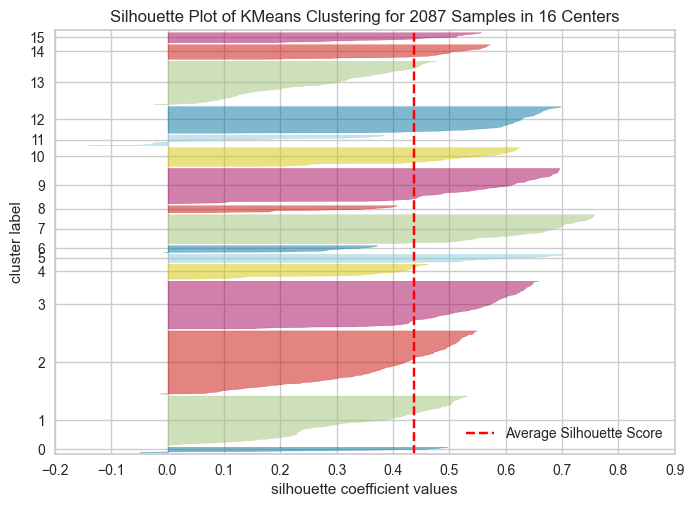

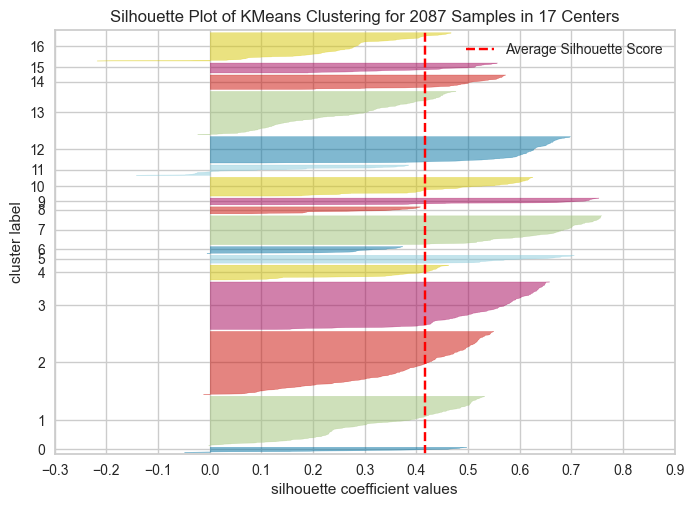

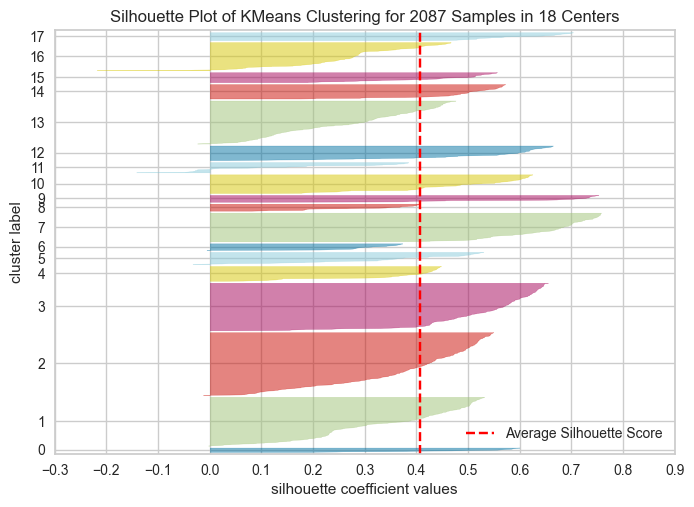

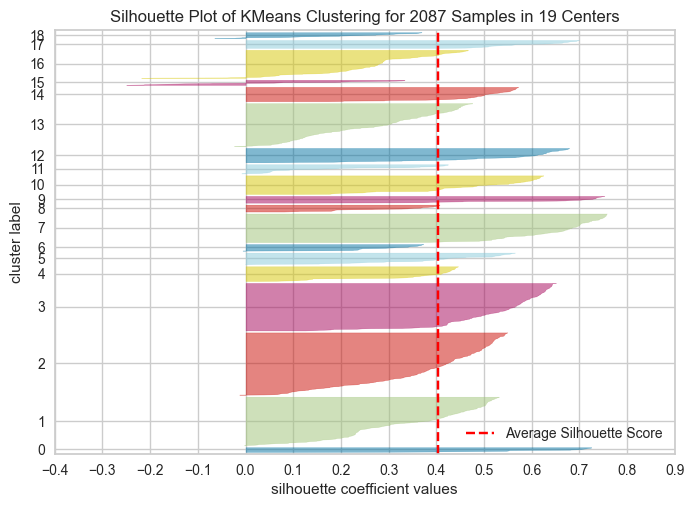

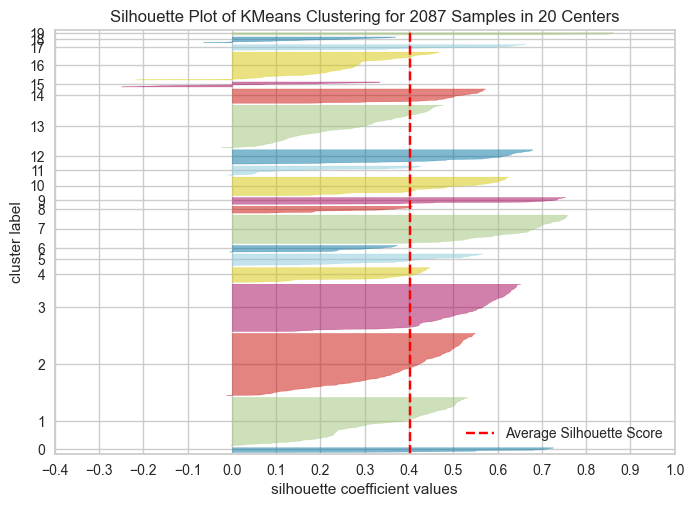

In [36]:
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    graph = SilhouetteVisualizer(kmeans, colors='yellowbrick')

    graph.fit(df_)
    graph.show()

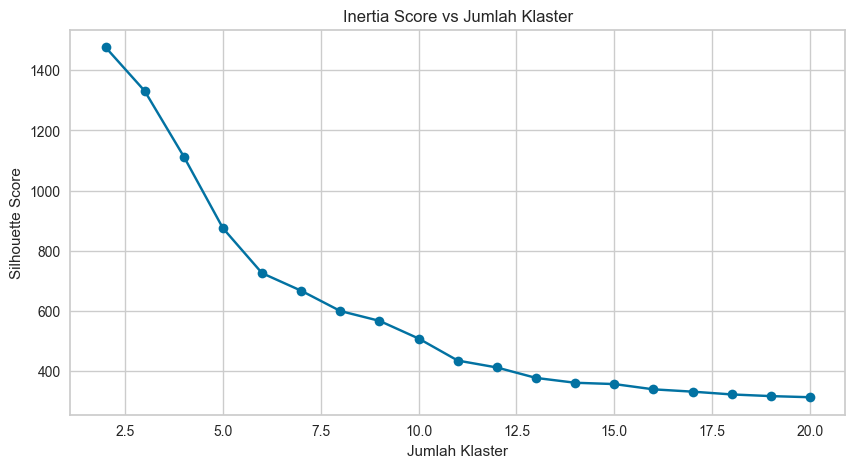

In [37]:
WSS_scores = []

for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_)

    WSS_scores.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(2, 21), WSS_scores, marker='o')
plt.title('Inertia Score vs Jumlah Klaster')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

### c) Pilih k yang optimal berdasarkan hasil Silhouette Coefficient dan elbow method

In [38]:
k = 9

### d) Latih model KMeans dengan **nilai k yang sudah ditentukan** sebelumnya. Visualisasikan hasil clustering-nya

In [39]:
model = KMeans(n_clusters=k, random_state=42)
model.fit(df_)

clusters = model.predict(df_)

display(clusters)

array([6, 6, 6, ..., 2, 2, 2], dtype=int32)

In [40]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3)
tsne_results = tsne.fit_transform(df_)

df_3d = pd.DataFrame(tsne_results, columns=['x', 'y', 'z'])
df_3d['cluster'] = clusters

df_3d

,x,y,z,cluster
0,-5.122895,-5.889598,-10.177590,6
1,-9.348695,-6.242291,-9.533268,6
2,-7.399819,-7.293998,-13.288837,6
3,-3.086716,-9.658104,9.819558,0
4,8.956048,1.345428,-19.743475,1
...,...,...,...,...
2082,0.718570,0.073287,-5.481056,2
2083,2.787194,1.110438,-4.229113,2
2084,2.930113,1.175081,-4.129959,2
2085,13.835875,3.733159,3.907047,2


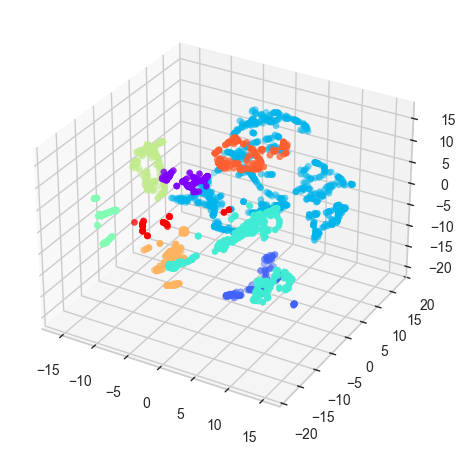

In [41]:
ax = plt.axes(projection="3d")
ax.scatter(df_3d['x'], df_3d['y'], df_3d['z'], c=df_3d['cluster'], cmap='rainbow')

plt.grid(False)
plt.show()

### e) Berikan interpretasi terhadap hasil visualisasi yang telah anda lakukan pada bagian (d)

Jumlah pemilihan k = 9 dapat dikatakan cukup baik karena hasil visualisasi menunjukkan klaster yang cukup jelas dan tidak terlalu banyak klaster yang terbentuk.

## Hierarchical Clustering

In [42]:
# Gunakan fungsi ini untuk menampilkan dendogram

# Fungsi untuk menampilkan dendogram
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot dendogram yang dihasilkan
    shc.dendrogram(linkage_matrix, **kwargs)

Penerapan Hierarchical Clustering dengan menggunakan AgglomerativeClustering, dapat diterapkan dengan beberapa metode perhitungan (maximum, minimum, average) dengan menambahkan parameter linkage saat pembuatan instance AgglomerativeClustering.

Pada latihan **Hierarchical Clustering**, Anda diminta untuk menerapkan **minimal 2 metode perhitungan (linkage)**.

Anda dapat melihat penjelasannya [di sini](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html), atau memilih dari salah satu metode berikut:

1. **‘ward’**  
2. **‘complete’**  
3. **‘average’**  
4. **‘single’**  


### Metode 1

#### a) Latih model Agglomerative clustering sementara tanpa menspesifikasikan jumlah cluster

In [43]:
agglomerative = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='ward')
cluster_assignment = agglomerative.fit_predict(df_)

#### b) Tampilkan dendogram dan berikan interpretasinya. Selanjutnya, tentukan jumlah klaster (nilai k) yang optimal

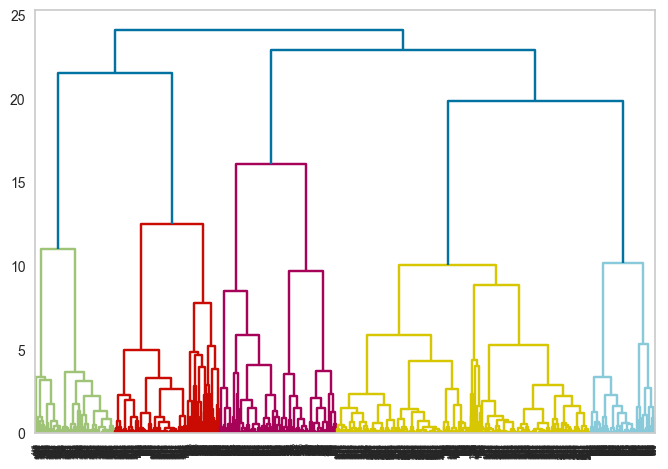

In [44]:
plt.grid(False)
plot_dendrogram(agglomerative, truncate_mode=None)

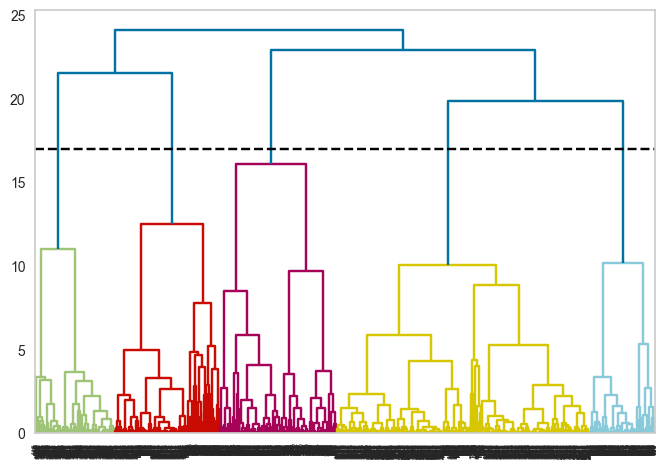

In [45]:
plt.grid(False)
plot_dendrogram(agglomerative, truncate_mode=None)
plt.axhline(y = 17, color = 'black', linestyle = 'dashed')

Terlihat pada treshold 17, 5 klaster lah yang optimal

#### c) Latih model agglomerative clustering dengan nilai k yang sudah ditentukan sebelumnya. Visualisasikan hasil clustering-nya

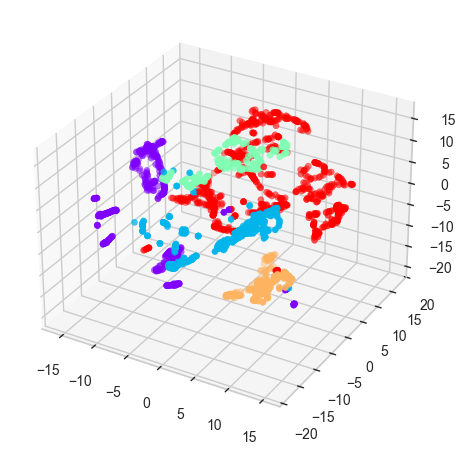

In [46]:
agglomerative = AgglomerativeClustering(n_clusters=5, distance_threshold=None)
cluster_assignment = agglomerative.fit_predict(df_)

df_3d['cluster'] = cluster_assignment

ax = plt.axes(projection="3d")
ax.scatter(df_3d['x'], df_3d['y'], df_3d['z'], c=df_3d['cluster'], cmap='rainbow')

plt.grid(False)
plt.show()

### Metode 2

#### a) Latih model Agglomerative clustering sementara tanpa menspesifikasikan jumlah cluster

In [47]:
agglomerative = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='complete')
cluster_assignment = agglomerative.fit_predict(df_)

#### b) Tampilkan dendogram dan berikan interpretasinya. Selanjutnya, tentukan jumlah klaster (nilai k) yang optimal

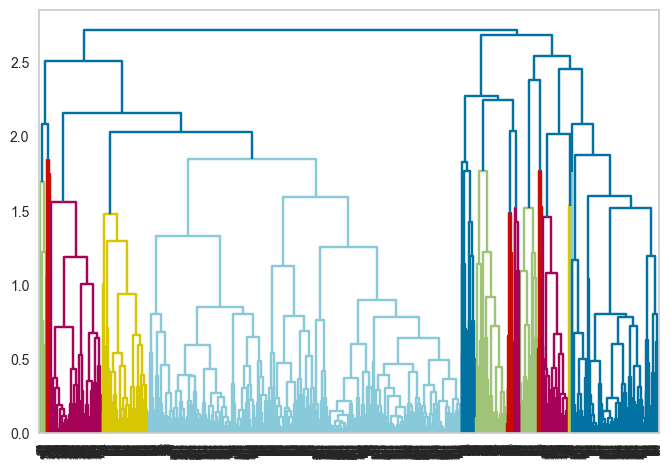

In [48]:
plt.grid(False)
plot_dendrogram(agglomerative, truncate_mode=None)

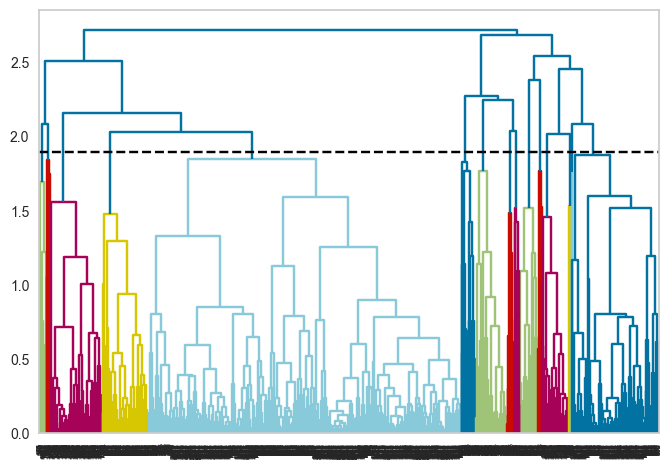

In [49]:
plt.grid(False)
plot_dendrogram(agglomerative, truncate_mode=None)
plt.axhline(y = 1.9, color = 'black', linestyle = 'dashed')

terlihat pada treshold 19, terdapat 15 klaster yang optimal

#### c) Latih model agglomerative clustering dengan nilai k yang sudah ditentukan sebelumnya. Visualisasikan hasil clustering-nya

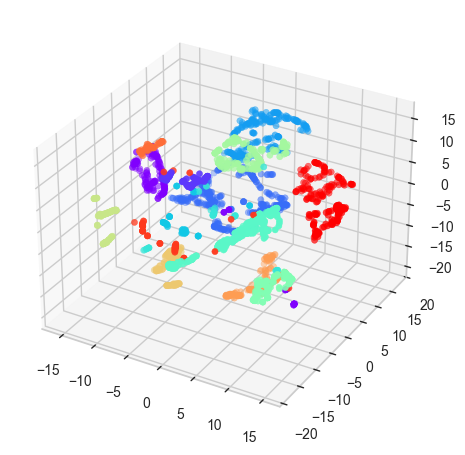

In [50]:
agglomerative = AgglomerativeClustering(n_clusters=15, distance_threshold=None)
cluster_assignment = agglomerative.fit_predict(df_)

df_3d['cluster'] = cluster_assignment

ax = plt.axes(projection="3d")
ax.scatter(df_3d['x'], df_3d['y'], df_3d['z'], c=df_3d['cluster'], cmap='rainbow')

plt.grid(False)
plt.show()


### Perbandingan Metode 1 dan 2

Bandingkan hasil dari kedua metode Hierarchical Clustering yang telah diterapkan! Jelaskan metode mana yang menghasilkan visualisasi yang lebih baik beserta alasannya!

Wajib untuk mencantumkan sumber terkait

Metode kedua lebih bisa memisahkan klaster dengan lebih baik karena terdapat lebih banyak klaster yang terbentuk dari treshhold yang diambil. Visualisasi metode kedua lebih bisa mendeteksi klaster-klaster kecil yang terbentuk. Metode ini lebih mengindetifikasi data dengan lebih atomik/granular.

**Referensi**
- https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html

## Soal Teoritis

### 1) Perbandingan Silhouette Coefficient dan Elbow Method

**Pada bagian K-Means Clustering**, Anda telah menerapkan dua metode dalam pemilihan jumlah klaster (*k*), yaitu **Silhouette Coefficient** dan **Elbow Method**. Jawab pertanyaan di bawah ini sesuai dengan kondisi yang terjadi pada penerapan Anda:  

1. **Jika hasil *k* dari Silhouette Coefficient dan Elbow Method sama:**  
   Berikan penjelasan mengapa kedua metode ini dapat menghasilkan nilai *k* yang sama.  

2. **Jika hasil *k* dari Silhouette Coefficient dan Elbow Method berbeda:**  
   Jelaskan strategi Anda dalam memilih *k* dari salah satu metode tersebut, dan berikan alasan mengapa Anda memilih *k* dari metode tersebut.

Wajib untuk mencantumkan sumber terkait

1. Jika hasil k dari Silhouette Coefficient dan Elbow Method sama, maka kedua metode tersebut menghasilkan nilai k yang sama karena kedua metode tersebut memiliki tujuan yang sama yaitu meminimalkan inersia dan memaksimalkan jarak antar klaster. Silhouette menghasilkan clustering berdasarkan kedekatan dari kelompok asal dan kejauhan dari kelompok lainnya. Sedangkan Elbow Method menghasilkan clustering berdasarkan inersia. Kedua metode tersebut menghasilkan nilai k yang sama karena kedua metode tersebut memiliki tujuan yang sama yaitu meminimalkan inersia dan memaksimalkan jarak antar klaster. jika k sama maka secara statistik dan geometri, jumlah k tersebut merupakan representasi terbaik dari data

2. Jika hasil k dari Silhouette Coefficient dan Elbow Method berbeda, maka saya akan memilih k dari Silhouette Coefficient karena metode tersebut lebih akurat dalam menentukan jumlah klaster yang optimal. Elbow method lebih efisien secara komputasi, namun tidak selalu menghasilkan nilai k yang optimal. Silhouette Coefficient lebih akurat dalam menentukan jumlah klaster yang optimal karena menghitung rata-rata jarak intra-cluster dan minimum rata-rata jarak inter-cluster.

**Referensi**
- https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/
- https://adria708.medium.com/elbow-method-vs-silhouette-co-efficient-in-determining-the-number-of-clusters-33baff2fbeee
- Slide kuliah

### 2) Perbandingan K-Means dan Hierarchical Clustering

Jelaskan hasil yang Anda peroleh dalam penerapan kedua metode ini untuk Clustering.

1. Jika terdapat kesamaan hasil, jelaskan analisis anda mengapa kedua metode ini dapat menghasilkan klaster yang sama.
2. Jika terdapat perbedaan hasil, metode mana yang lebih baik untuk digunakan dan berikan alasannya!

Wajib untuk mencantumkan sumber terkait

Terdapat perbedaan hasil pada kedua metode clustering. K-Means clustering menghasilkan klaster yang lebih baik karena memiliki nilai silhouette coefficient yang lebih tinggi dibandingkan dengan hierarchical clustering. Hal ini disebabkan karena K-Means clustering lebih cocok digunakan pada data yang memiliki bentuk klaster yang jelas. Sedangkan hierarchical clustering lebih cocok digunakan pada data yang memiliki bentuk klaster yang tidak jelas. Klaster yang dihasilkan K-means tidak saling overlap dan lebih jelas dibandingkan dengan hierarchical clustering. Oleh karena itu, K-means menghasilkan data klaster yang lebih jelas divisualisasikan

**Referensi**
- https://www.geeksforgeeks.org/difference-between-k-means-and-hierarchical-clustering/
- https://datarundown.com/hierarchical-vs-k-means-clustering/


### 3) Jika kita melakukan metode K-Means Clustering berulang kali, apakah akan selalu didapatkan hasil yang sama?

Wajib untuk mencantumkan sumber terkait

Algoritma K-means memerlukan angka acak untuk memilih titik awal kluster (centroid). Oleh karena itu, hasil dari K-means clustering bisa berbeda-beda setiap kali dijalankan. Namun, jika titik awal kluster sudah ditentukan, hasil dari K-means clustering akan selalu sama.

**Referensi**
- https://stats.stackexchange.com/questions/58238/how-random-are-the-results-of-the-kmeans-algorithm